## Name :- Shriraj Chauhan

Importing Libraries


In [1]:
import numpy as np
from sklearn.cluster import KMeans
import cv2
from skimage.color import rgb2lab,deltaE_cie76
import os
import matplotlib.pyplot as plt
from collections import Counter

Defining functions for colour conversion and loading image

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]),int(color[1]),int(color[2]))


def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(400,600),interpolation = cv2.INTER_AREA)
    image = image.reshape(image.shape[0]*image.shape[1],3)
    return image

Defining function for color extraction and visualising distribution on a pie chart

In [3]:
def get_colors(image,number_of_colors,show_chart):
    clf = KMeans(n_clusters = number_of_colors)
    lables = clf.fit_predict(image)
    counts = Counter(lables)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors

Infering above function

[array([ 4.9641965 , 75.00788232,  4.92262004]),
 array([208.49073554, 249.87535093, 206.14261651]),
 array([ 11.09158506, 174.90414482,   6.23848386]),
 array([179.24137339, 236.93135477,  11.70767572]),
 array([  5.83394622, 133.20389506,   5.30815375]),
 array([121.58104374, 217.65967797,   9.82007537]),
 array([ 70.05969411, 198.79432354,  12.47587886])]

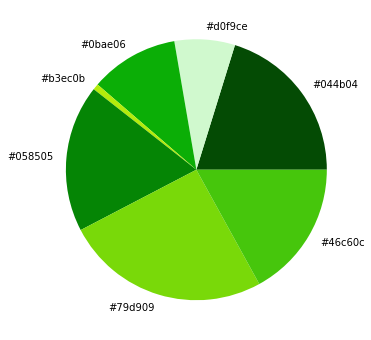

In [4]:
image = get_image("/content/drive/MyDrive/Colab Notebooks/GRIP/Colour detection/images/download.jpg")
get_colors(image,7,show_chart = True)


Adding directory to path which contains images

In [5]:
image_directory = "/content/drive/MyDrive/Colab Notebooks/GRIP/Colour detection/images"
colors = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED':[255,0,0],
    "GRAY":[128,128,128]
}
images = []

for file in os.listdir(image_directory):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(image_directory, file)))

visualising images in the directory

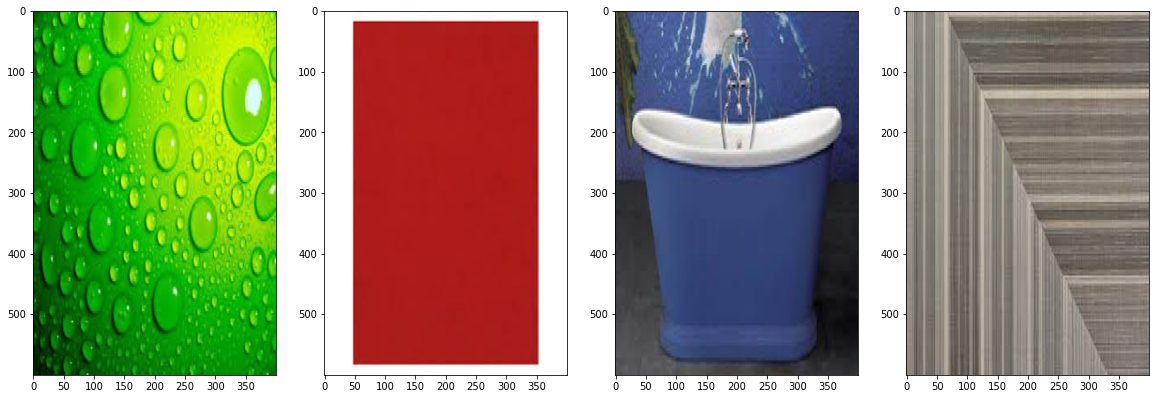

In [6]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i].reshape(600,400,3))



Defining a function which matches image color by given color 

In [7]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

Defining a function which shows all the matched images

In [8]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i].reshape(600,400,3))
            index += 1

Inference for color BLUE

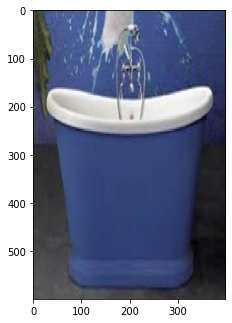

In [9]:
plt.figure(figsize = (20, 10))
show_selected_images(images, colors["BLUE"], 60, 5)

Inference for color RED

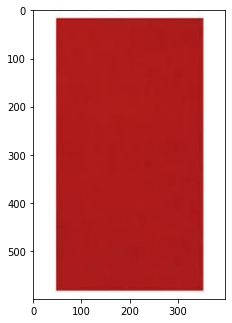

In [10]:
plt.figure(figsize = (20, 10))
show_selected_images(images, colors["RED"], 60, 5)

Inference for color GREEN

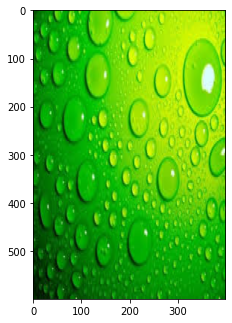

In [11]:
plt.figure(figsize = (20, 10))
show_selected_images(images, colors["GREEN"], 60, 5)